In some cases people use mean value of LiDAR points to find center of structure.   
It not works well when density is not constant, so we should use simple way - just finding uttermost points.   
Here I will show how structure coordinates are finding.  
  
  

In [2]:
import laspy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

open the LAS file with LiDAR points. There are classifyed to two classes: ground and structure poins

In [4]:
inFile = laspy.file.File('one_tower_vgrd.las', mode="r")

reading points and saving them to array

In [5]:
coords = np.vstack((inFile.x, inFile.y, inFile.z, inFile.raw_classification)).transpose()

structure points array 

In [6]:
tow = coords[coords[:, 3] == 203]  # 203 class only
tow = np.delete(tow, 3, 1)

ground array

In [46]:
grd = coords[coords[:, 3] == 2]  #just ground class
grd = np.delete(grd, 3, 1)    

add distance from initial center of structure to the ground points  

In [43]:
ctow = [1847014, 5765692]

In [44]:
dist = np.sum((grd[:,[0, 1]] - ctow)**2, axis = 1)    # there is no sqrt, just keep it in mind

In [47]:
grd = np.c_[grd, dist]    # add dist to grd array
grd[1]

array([1.84699884e+06, 5.76571449e+06, 3.80740000e+02, 7.35625700e+02])

then finding preliminary ground level

In [48]:
rg = 7   # remember that there is squared radius
grd_lvl = np.mean(grd[grd[:, 3] < rg][:,2])   # mean elevation 

structure bottom slice

In [62]:
bot_str = 25    # percent of structure hight
tow_top = max(tow[:,2])
bot_lvl = (tow_top-grd_lvl)*(bot_str/100)+grd_lvl
tow_bot = tow[tow[:,2] < bot_lvl]

structure top

In [50]:
up_str = 10    # percent of structure hight
tow_top = max(tow[:,2])
up_lvl = (tow_top-grd_lvl)*((100-up_str)/100)+grd_lvl
tow_up = tow[tow[:,2] > up_lvl]

mean value of bottom slice

In [63]:
me = np.mean(tow_bot, axis=0)

mean of top

In [52]:
me_up = np.mean(tow_up, axis=0)

and there is our calc of middle point: 

In [64]:
my_y = (min(tow_bot[:,1]) + max(tow_bot[:,1]))/2
my_x = (min(tow_bot[:,0]) + max(tow_bot[:,0]))/2


In [56]:
my_up_y = (min(tow_up[:,1]) + max(tow_up[:,1]))/2
my_up_x = (min(tow_up[:,0]) + max(tow_up[:,0]))/2


 ground level could be corrected here with the new structure center

lets plot top view of structure

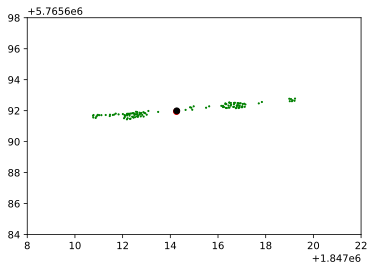

In [67]:
plt.axis([1847008, 1847022, 5765684, 5765698])
plt.scatter(tow[:, 0], tow[:, 1], color = 'green', s=1.5)
plt.scatter(me[0], me[1], color = 'red')
plt.scatter(my_x, my_y, color = 'black')
plt.show()

here we see that mean value (red dot) is almost match our calculated middle point (black)

lets look at the side view:

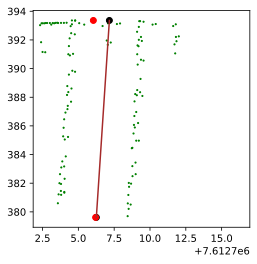

In [66]:
plt.scatter((tow[:, 1]+tow[:, 0]), tow[:, 2], color = 'green', s=1.5)
plt.scatter((my_x+my_y), grd_lvl, color = 'black')
plt.scatter((my_up_x+my_up_y), tow_top, color = 'black')
plt.scatter((me[0]+me[1]), grd_lvl, color = 'red')
plt.scatter((me_up[0]+me_up[1]), tow_top, color = 'red')
plt.plot((my_x+my_y, my_up_x+my_up_y), (grd_lvl, tow_top), color='brown')
plt.axis('square')
plt.show()

Here we see that mean point on top (red) is moved left as there are more LiDAR points, while mean on ground level looks better. Axis of structure fits good enough, but this one is just raw example of algorithm which should be finalize for better result. 